# Predicting Insurance Product Purchases: KNN and SVM Model Comparison

# Introduction 

The project focuses on developing and comparing classification models to predict whether insurance company customers are likely to purchase additional insurance products. At the request of insurance companies, we will explore K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models as alternatives to binary logistic regression. These models are designed to improve customer retention and sales practices by more accurately identifying potential buyers. Our project workflow includes exploratory data analysis, data preparation, feature selection, and thorough model performance evaluation. By leveraging these models, we aim to provide insurance companies with actionable insights to enhance sales strategies and improve customer satisfaction in the insurance industry.

## Data loading

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the URL with the direct link to the raw csv file
url = "https://raw.githubusercontent.com/Juanfra21/data-science/main/M7_Data.csv"

# Load data from the csv file into a pandas DataFrame
df = pd.read_csv(url)

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the table
df

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


# EDA

In [2]:
# Numeric EDA plots
def numeric_eda_plots(dataframe, column_name, x_label):
    '''
    Purpose: Generates a histogram and a box plot

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name (str): The name of the column in the DataFrame to be plotted.
    - x_label (str): The label for the x-axis.
    '''
    #Define the figure
    fig_1 = plt.figure(1)

    #Adjust the distance between the plots
    plt.subplots_adjust(hspace=0.6)

    ### First plot - Histogram ###
    plt.subplot(211) #Position
    plt.title("Histogram of Target") #Title
    sns.histplot(data = dataframe, x = column_name, kde=True)
    plt.xlabel(x_label);

    ### Second plot - Box plot ###
    plt.subplot(212) #Position
    plt.title("Box plot of Target") #Title
    sns.boxplot(data = dataframe, x = column_name);
    plt.xlabel(x_label);

# Numeric EDA summary
def numeric_eda_summary(dataframe, column_name):
    '''
    Purpose: Generates count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. 
    
    Parameters:

    - dataframe (DataFrame): The input DataFrame containing the data.
    - column_name (str): The name of the numerical column.
    '''
    return dataframe[column_name].describe()

# Categorical EDA plot
def categorical_eda_plot(dataframe, column_name, plot_title, x_label, y_label):
    '''
    Purpose: Generates a bar plot

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name (str): The name of the column in the DataFrame to be plotted.
    - plot_title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    '''
    # Create a bar plot using Seaborn
    sns.countplot(x=column_name, data=dataframe, edgecolor="black", palette='viridis')

    # Add labels and title
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90);

# Categorical EDA description    
def categorical_eda_summary(dataframe, column_name):
    '''
    Purpose: Generates category name, count of occurrences, and the percentage of total
    
    Parameters:

    - dataframe (DataFrame): The input DataFrame containing the data.
    - column_name (str): The name of the categorical column.
    '''
    summary = dataframe[column_name].value_counts().reset_index()
    summary.columns = ['Category', 'Count']
    summary['Percentage of Total'] = round((summary['Count'] / summary['Count'].sum()) * 100,2)
    return summary

# Numeric vs Numeric Scatter Plot
def numeric_numeric_plot(dataframe, column_name_x, column_name_y, plot_title, x_label, y_label):
    '''
    Purpose: Generates a scatter plot
    
    Parameters:

    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name_x (str): The name of the column in the DataFrame to be plotted in the X axis, it has to be numeric.
    - column_name_y (str): The name of the column in the DataFrame to be plotted in the Y axis, it has to be numeric.    
    - plot_title (str): The title of the plot.
    - x_label (str): The label for the x-axis.
    - y_label (str): The label for the y-axis.
    '''    
    # Figure Size
    #plt.figure(figsize=(10, 6))
    
    # Plot
    sns.scatterplot(x=column_name_x, y=column_name_y, data=dataframe)
    
    # Title and labels
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

# Numeric vs Categorical Box Plots
def numeric_categorical_plot(dataframe, column_name_numeric, column_name_cat, plot_title, numeric_label, cat_label):
    '''
    Function: categorical_numerical_plot(dataframe, column_name_numeric, column_name_cat, plot_title, numeric_label, cat_label)

    Purpose: Generates a box plot to visualize the relationship between a categorical variable and a numerical variable.

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data to be plotted.
    - column_name_numeric (str): The name of the numerical column in the DataFrame to be plotted on the Y axis.
    - column_name_cat (str): The name of the categorical column in the DataFrame to be plotted on the X axis.
    - plot_title (str): The title of the plot.
    - numeric_label (str): The label for the Y-axis (numerical variable).
    - cat_label (str): The label for the X-axis (categorical variable).
    '''    
    # Define data
    sns.catplot(data=dataframe, x=column_name_cat, y=column_name_numeric, kind="box", palette='Set1', height=4, aspect=2)

    # Add labels and title
    plt.title(plot_title)
    plt.ylabel(numeric_label)
    plt.xlabel(cat_label)
    plt.grid(True);

    
# Numeric vs Categorical summary    
def numeric_categorical_summary(dataframe, numeric_column, categorical_column):
    '''
    Purpose: Generates a table showing the distribution of a numeric variable across different categories of a categorical variable.

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data.
    - numeric_column (str): The name of the numeric column for which statistics are to be calculated.
    - categorical_column (str): The name of the categorical column used to group the data.
    '''
    # Group data by the categorical variable
    grouped_data = dataframe.groupby(categorical_column)

    # Calculate descriptive statistics for the numeric column within each group
    description = grouped_data[numeric_column].describe()

    # Rename the index to match the categorical column
    description.index.name = categorical_column
    
    # Transpose the DataFrame
    description_transposed = description.T

    return description_transposed


def categorical_categorical_summary(dataframe, categorical_column_rows, categorical_column_columns, rows_columns):
    '''
    Purpose: Generates a table showing the percentage for each pair of categories from two categorical columns in a DataFrame.

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data.
    - categorical_column_1 (str): The name of the first categorical column.
    - categorical_column_2 (str): The name of the second categorical column.
    - rows_columns(int): Input 1 if columns should add up to 100%, input 2 if rows should add up to 100%
    '''

    # Group data by the two categorical columns
    grouped_data = dataframe.groupby([categorical_column_rows, categorical_column_columns]).size().unstack(fill_value=0)

    if rows_columns == 1:
        # Calculate sums
        row_sums = grouped_data.sum(axis=0)

        # Calculate the percentage for each pair of categories
        percentage_table = grouped_data.div(row_sums, axis=1) * 100
    
    elif rows_columns == 2:
        # Calculate sums
        row_sums = grouped_data.sum(axis=1)

        # Calculate the percentage for each pair of categories
        percentage_table = grouped_data.div(row_sums, axis=0) * 100

    return percentage_table

# Categorical vs Categorical vs Numerical Plot
def categorical_categorical_numerical_plot(dataframe, category_column_1, category_column_2, numeric_column, title):
    '''
    Purpose: Generates a grouped bar chart for visualizing the relationship between two categorical variables.

    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data.
    - category_column_1 (str): The name of the first categorical column for the x-axis.
    - category_column_2 (str): The name of the second categorical column for grouping the bars.
    - numeric_column (str): The name of the numeric column for the y-axis.
    - title (str): The title of the plot.
    '''
    # Figure Size
    #plt.figure(figsize=(10, 6))
    
    # Create Plot
    sns.barplot(x=category_column_1, y=numeric_column, hue=category_column_2, data=dataframe, palette='viridis', estimator=np.mean)
    
    # Add labels and title
    plt.xlabel(category_column_1)
    plt.ylabel(numeric_column)
    plt.title(title)
    plt.legend(title=category_column_2)

## General EDA 

### Data types

In [3]:
# Display data types of each column
df.dtypes

TARGET         object
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

Now, we convert the "Target" indicators to digits.

In [4]:
# Replace the Y with 1 and N with 0
df['TARGET'] = df['TARGET'].map({'Y': 1, 'N': 0})
 
# Show the results
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


### Missing Data Values

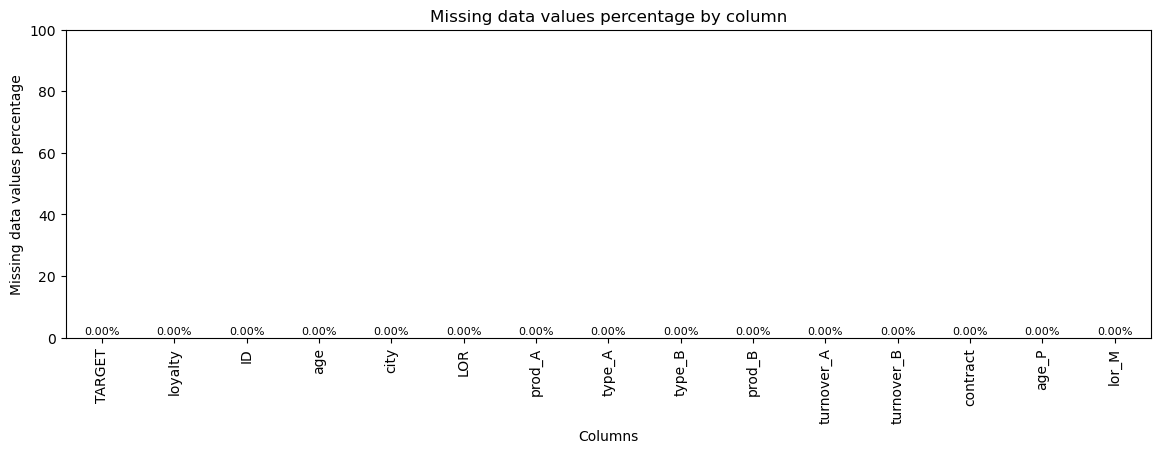

In [5]:
# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Let's show the percentage of missing data values per column
nan_count_by_column = df.isna().sum()
total_rows = len(df)

# Calculate the percentage of NaNs for each column
nan_percentage_by_column = (nan_count_by_column / total_rows) * 100

# Plotting with Seaborn
plt.figure(figsize=(14, 4))
sns.barplot(x=nan_percentage_by_column.index, y=nan_percentage_by_column.values, palette="viridis")

# Adding labels and title
plt.xlabel("Columns")
plt.ylabel("Missing data values percentage")
plt.title("Missing data values percentage by column")

# Display the percentage values on top of each bar
for i, value in enumerate(nan_percentage_by_column.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=8)

# Set y-axis limits to range from 0 to 100
plt.ylim(0, 100)   
    
# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

There is no missing data.

### Duplicated data

In [6]:
# Check the total number of duplicated rows
df.duplicated().sum()

3008

As it shown,there are 3008 duplicated rows. 

## Univariate EDA

### Target

In [7]:
categorical_eda_summary(df, 'TARGET')

,Category,Count,Percentage of Total
0,0,8000,57.08
1,1,6016,42.92


According to the data, there are two categories of TARGET: category 0 and category 1. Category 0 has 8,000 samples, accounting for 57.08% of the total, while category 1 has 6,016 samples, accounting for 42.92% of the total.

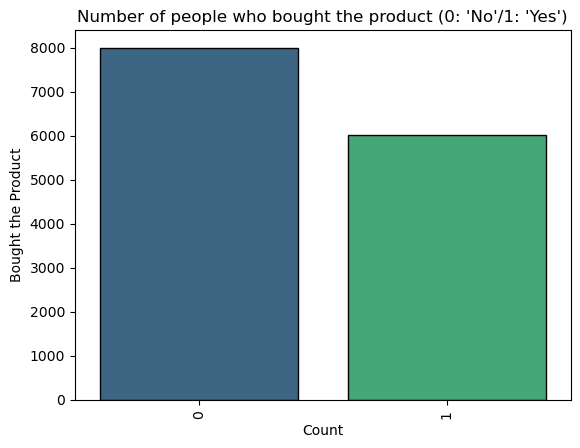

In [8]:
categorical_eda_plot(df, 'TARGET', "Number of people who bought the product (0: 'No'/1: 'Yes')", 'Count', 'Bought the Product')

Out of the sample, the number of people who did not buy was close to 8,000, while the number of people who chose to buy was close to 6,000, indicating that most people chose not to buy the product.

### Loyalty

In [9]:
categorical_eda_summary(df, 'loyalty')

,Category,Count,Percentage of Total
0,99,6986,49.84
1,3,3069,21.90
2,1,2480,17.69
3,2,1425,10.17
4,0,56,0.40


Loyalty levels from low to high are 0, 1, 2 and 3, with level 99 indicating unclassified. Among them, the number of customers with level 99 is the largest, reaching 6,986, followed by customers with level 3, with 3,069 people. The number of customers at levels 0 and 2 is relatively small, at 56 and 1,425 respectively.

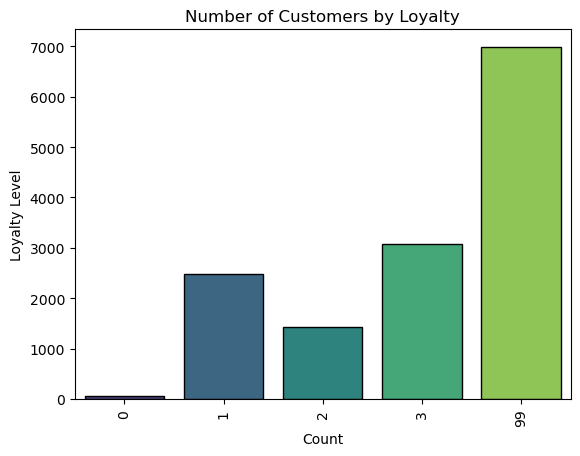

In [10]:
categorical_eda_plot(df, 'loyalty', "Number of Customers by Loyalty", 'Count', 'Loyalty Level')

This bar chart shows the distribution of the number of customers at different levels of loyalty. It is clear from the chart that the number of customers with a loyalty level of "99" far exceeds the other levels, approaching 7,000. In comparison, the number of customers with loyalty levels "3", "1" and "2" is relatively small, while the number of customers with loyalty level "0" is the smallest.

### Age

In [11]:
numeric_eda_summary(df, 'age')

count    14016.000000
mean        35.882920
std         12.974634
min          5.000000
25%         25.000000
50%         33.000000
75%         43.000000
max        102.000000
Name: age, dtype: float64

The average age of the sample is approximately 36 years old. As we can see, 25% are less than or equal to 25 years old, 25% are between 25 and 33 years old, and 25% are older than 43 years. The oldest customer who responded to this is 102 years old, and the youngest is 5 years old. The sample is highly dispersed.

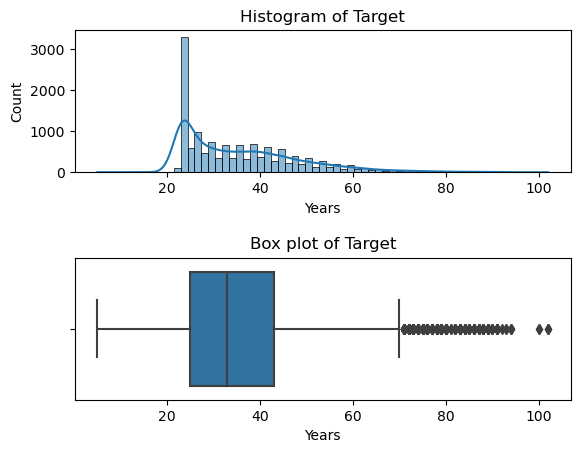

In [12]:
numeric_eda_plots(df, 'age', 'Years')

The boxplot reveals a median age around 35 and outliers over 80. The histogram indicates a right-skewed distribution, with a peak frequency in the 20-30 age range. The frequency decreases for higher age brackets, particularly after 60. Both plots suggest a younger age demographic predominates in the dataset.

The dataset primarily consists of a younger population, with fewer elderly individuals, and a notable presence of outliers above 80 years of age.

### City

In [13]:
categorical_eda_summary(df, 'city')

,Category,Count,Percentage of Total
0,2,13720,97.89
1,1,28,0.20
2,0,26,0.19
3,8,21,0.15
4,9,20,0.14
...,...,...,...
60,51,1,0.01
61,107,1,0.01
62,174,1,0.01
63,141,1,0.01


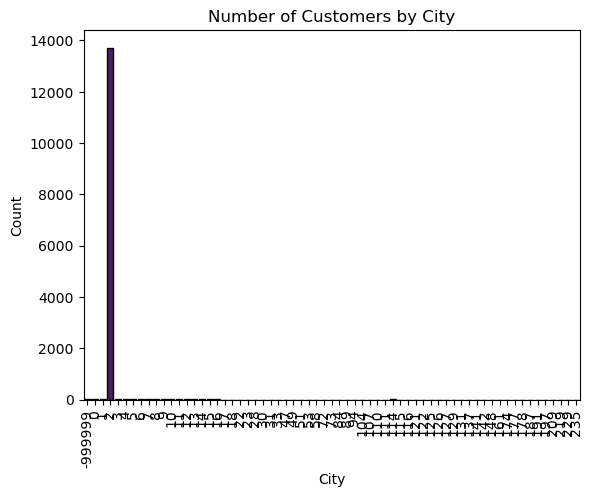

In [14]:
categorical_eda_plot(df, 'city', "Number of Customers by City", 'City', 'Count')

As can be seen, most city is city 2. For the other cities, the count is little.

### Age of Partner

In [15]:
numeric_eda_summary(df, 'age_P')

count    14016.000000
mean        35.882920
std         12.974634
min          5.000000
25%         25.000000
50%         33.000000
75%         43.000000
max        102.000000
Name: age_P, dtype: float64

The average age of partner is approximately 36 years old. As we can see, 25% are less than or equal to 25 years old, 25% are between 25 and 33 years old, and 25% are older than 43 years. The oldest partner who responded to this is 102 years old, and the youngest is 5 years old. The sample is highly dispersed.

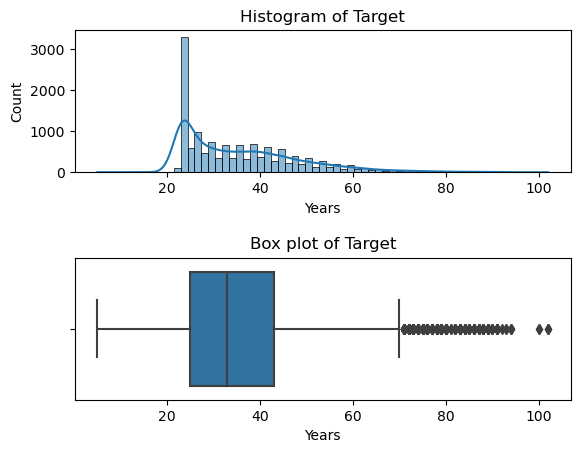

In [16]:
numeric_eda_plots(df, 'age_P', 'Years')

Box plot showing the distribution of partner ages. Most of the data points are concentrated between about 20 and 60 years old, while some outliers appear above the main bins, up to about 100 years old.

The histogram shows the distribution of partner ages. Most partners are between 40 and 60 years old, as shown by the top bar, with counts gradually decreasing as age exceeds this range.

### Length of Relationship (Years)

In [17]:
numeric_eda_summary(df, 'LOR')

count    14016.000000
mean         0.926299
std          0.965212
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: LOR, dtype: float64

This variable represents the duration of the relationship between the customer and the company, and the sample size is 14016. The average relationship duration is about 0.93 years, and the standard deviation is about 0.97 years. The shortest relationship duration is 0 years, and the longest relationship duration is 6 years. The relationship duration of most customers is concentrated between 0 and 1 year. During the period, 50% of the customers’ relationship lasted for one year.

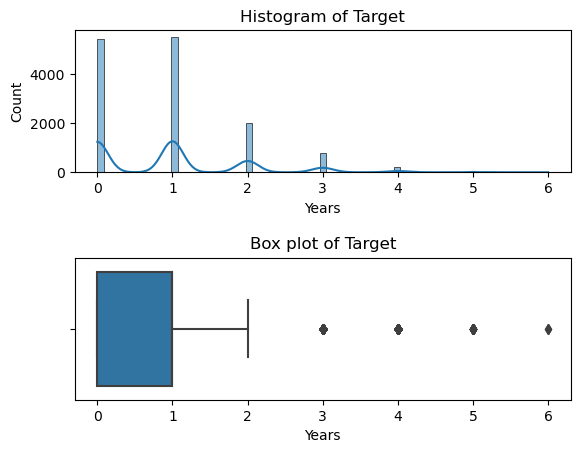

In [18]:
numeric_eda_plots(df, 'LOR', 'Years')

In the boxplot, we can see the distribution of relationship years. The blue boxes represent the interquartile range of approximately 0 to 1 year, where most customer relationship durations are concentrated. In addition, we observed that there are five outliers, distributed between approximately 4 and 6 years, which may indicate that a small number of customers have longer relationships.

In the histogram, there are two distinct bars at LORs 1 and 2, indicating that most relationships persist for one to two years in the data set, consistent with the boxplot observations.

### Length of Relationship (Months)

In [19]:
numeric_eda_summary(df, 'lor_M')

count    14016.000000
mean        14.115582
std         11.582550
min          3.000000
25%          3.000000
50%         15.000000
75%         15.000000
max         75.000000
Name: lor_M, dtype: float64

In general, the relationship between the customer and the company is around 14 months. There is a significant standard deviation compared to the average, indicating that the sample is highly dispersed.

25% have had a relationship for 3 months or less, 50% for between 3 and 15 months, and 25% for between 15 and 75 months.

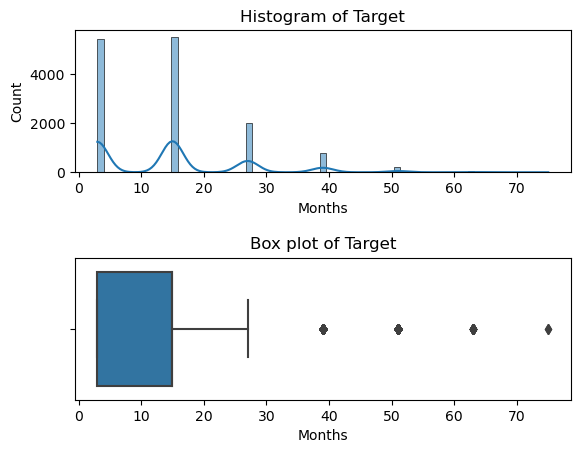

In [20]:
numeric_eda_plots(df, 'lor_M', 'Months')

The boxplot shows that the median relationship duration is about 20 months, while the outliers extend to about 70 months. This shows that in the data set, most customers' relationship durations are concentrated in the shorter range, but there are also some customers with longer relationship durations.

In the histogram, most relationships last between 0 and 20 months, which shows that most of the customers in the dataset have shorter relationship durations.

### Bought Product A

In [21]:
categorical_eda_summary(df, 'prod_A')

,Category,Count,Percentage of Total
0,1,7482,53.38
1,0,6534,46.62


prod_A indicates whether the customer purchased product A, where 0 means not purchased and 1 means purchased.The data shows that 7,482 samples (accounting for 53.38% of the total) stated that they did not purchase product A, while 6,534 samples (accounting for 46.62% of the total) stated that they purchased the product.

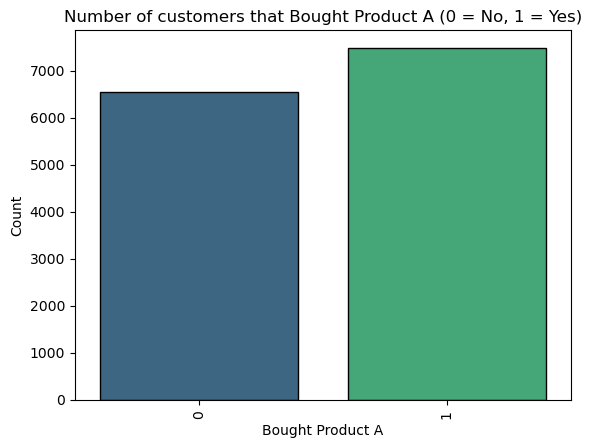

In [22]:
categorical_eda_plot(df, 'prod_A', "Number of customers that Bought Product A (0 = No, 1 = Yes)", 'Bought Product A', 'Count')

The chart shows that relatively more people buy product A, but there are still some people who choose not to buy it.

### Type of Product A

In [23]:
categorical_eda_summary(df, 'type_A')

,Category,Count,Percentage of Total
0,3,7452,53.17
1,0,6534,46.62
2,6,30,0.21


The data shows that 7,452 samples (accounting for 53.17% of the population) belong to type 0, 6,534 samples (accounting for 46.62% of the population) belong to type 1, and only 30 samples (accounting for 0.21% of the population) belong to type 6.

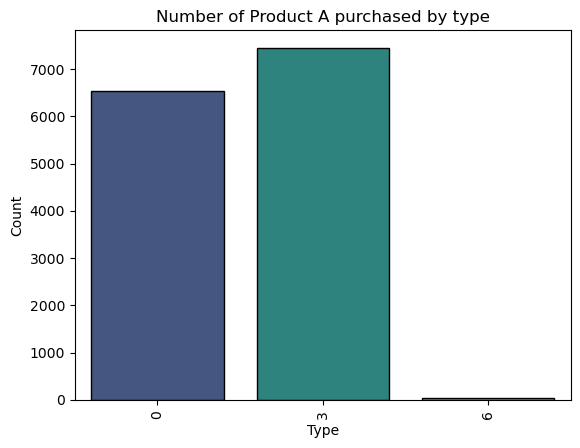

In [24]:
categorical_eda_plot(df, 'type_A', "Number of Product A purchased by type", 'Type', 'Count')

This chart indicates that The number of customers who buy product A type 3 is the largest, followed by type 0. Among the customers who buy product A, very few buy type 6.

### Turnover of Product A

In [25]:
numeric_eda_summary(df, 'turnover_A')

count    14016.000000
mean       379.161320
std         92.612207
min        300.095909
25%        334.919412
50%        367.891493
75%        399.744924
max       5568.784139
Name: turnover_A, dtype: float64

We can see that the average amount spent on product A is around 380, with a standard deviation of 92, which is not extreme.

The minimum value is 300, and 75% of the customers' spending is between 300 and 400.
The maximum value is around 5,569, which appears to be an outlier.

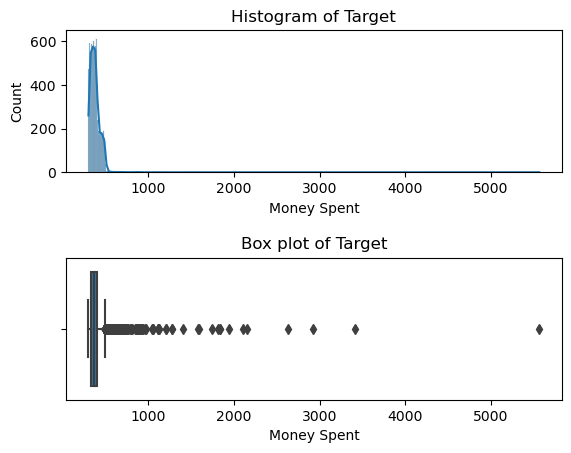

In [26]:
numeric_eda_plots(df, 'turnover_A', 'Money Spent')

In the boxplot, the distribution of costs for product A is shown. We can observe that there are several outliers above the main data points, which may represent some anomalies or particularly high costs.

In the histogram, there is a clear bar at the beginning of the X-axis, indicating a high frequency of that cost range, and the histogram gradually decreases as the cost increases.

### Bought Product B

In [27]:
categorical_eda_summary(df, 'prod_B')

,Category,Count,Percentage of Total
0,1,8402,59.95
1,0,5614,40.05


prod_B indicates whether the customer purchased product B, where 0 means not purchased and 1 means purchased. The data shows that 8,402 samples (accounting for 59.95% of the population) stated that they did not purchase product B, while 5,614 samples (accounting for 40.05% of the population) stated that they purchased the product.

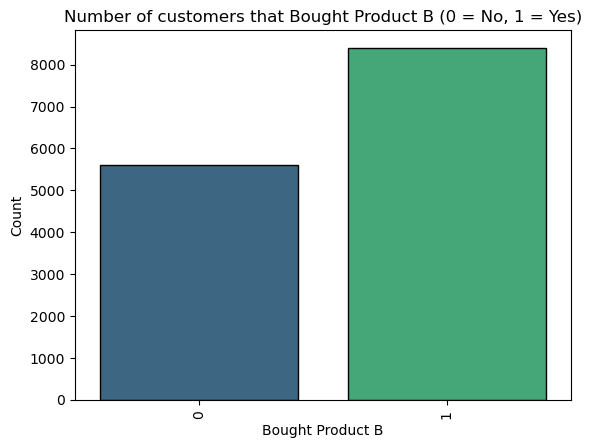

In [28]:
categorical_eda_plot(df, 'prod_B', "Number of customers that Bought Product B (0 = No, 1 = Yes)", 'Bought Product B', 'Count')

The chart shows that relatively more people buy product B, but there are still some people who chose not to buy it.

### Type of Product B

In [29]:
categorical_eda_summary(df, 'type_B')

,Category,Count,Percentage of Total
0,3,7874,56.18
1,0,5614,40.05
2,6,493,3.52
3,9,35,0.25


The data shows that there are four types of product B, namely type 3, type 0, type 6 and type 9. Among them, type 3 has 7874 samples, accounting for 56.18% of the total; type 0 has 5614 samples, accounting for 40.05% of the total; type 6 has 493 samples, accounting for 3.52% of the total; type 9 has 35 samples, accounting for 3.52% of the total. 0.25%. Among them, type 3 and type 0 are the main types, while the number of samples of type 6 and type 9 is relatively small.

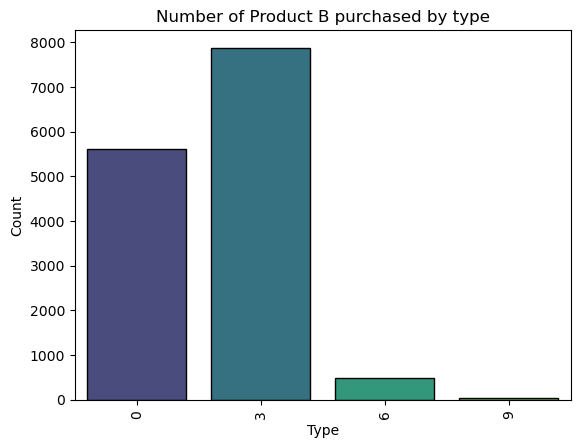

In [30]:
categorical_eda_plot(df, 'type_B', "Number of Product B purchased by type", 'Type', 'Count')

This chart indicates that The number of customers who buy product B type 3 is the largest, followed by type 0 and type 6. Among the customers who buy product B, very few buy type 9.

### Turnover of Product B

In [31]:
numeric_eda_summary(df, 'turnover_B')

count    14016.000000
mean       328.628207
std        475.616525
min        191.962852
25%        219.406925
50%        237.656757
75%        264.131538
max      12249.084770
Name: turnover_B, dtype: float64

For this product, we see that there is a high diversity in the amount of purchases.

The average spent is around 328 for this product, and the standard deviation is 475, which is quite large.

75% spent less than 265, but the maximum amount spent is 12,249, indicating that 25% spent between 265 and 12,249.

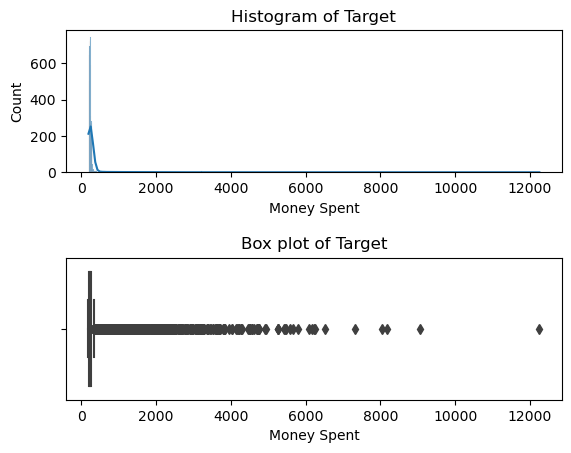

In [32]:
numeric_eda_plots(df, 'turnover_B', 'Money Spent')

As we can see from these figures, most of the customers spent between 200 and 6,000 on this product. However, the vast majority (around 90%) spent between 200 and 1,250. This is a significant amount for a single product.

### Contract

In [33]:
df['contract'].nunique()

1

As observed, there's only one value for contract and is 2.

## Bivariate EDA

### TARGET vs Loyalty

In [34]:
# We create a cross table
trgt_loyalty = categorical_categorical_summary(df, 'TARGET', 'loyalty', 1).reset_index()

# Show the results
trgt_loyalty

loyalty,TARGET,0,1,2,3,99
0,0,100.0,62.822581,66.175439,76.018247,44.517607
1,1,0.0,37.177419,33.824561,23.981753,55.482393


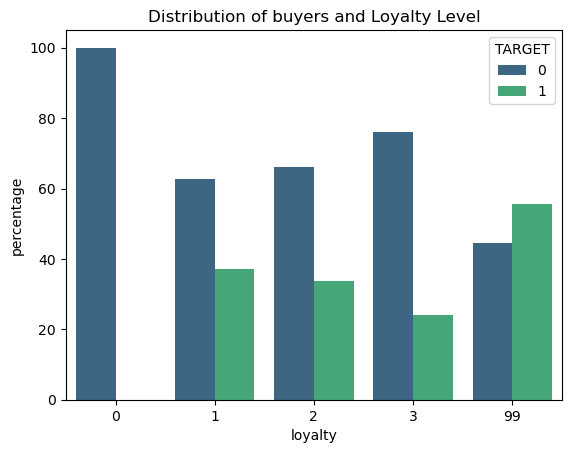

In [35]:
# We melt the normalized table to later plot it
trgt_loyalty_melted = trgt_loyalty.melt(id_vars=["TARGET"], var_name="loyalty", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_loyalty_melted, 'loyalty', 'TARGET', 'percentage', 'Distribution of buyers and Loyalty Level')

As can be seen from the chart, at loyalty level 0, almost 100% of buyers belong to the target 0 category. For loyalty levels 1 to 3 and level 99, there is a mix of both target categories, but target category 0 has more buyers. When loyalty is 0, buyers in the target category 0 account for 100%, while buyers in the target category 1 account for 0%. At other loyalty levels, there are more buyers in the Target 0 category than in the Target 1 category. Only when loyalty is 99, the proportion of customers with a goal of 1 is greater than that of customers with a goal of 0.

### TARGET vs Age

In [36]:
numeric_categorical_summary(df, 'age', 'TARGET')

TARGET,0,1
count,8000.000000,6016.000000
mean,33.027125,39.680519
std,12.934848,12.019518
min,5.000000,23.000000
25%,23.000000,30.000000
50%,27.000000,38.000000
75%,40.000000,47.000000
max,102.000000,102.000000


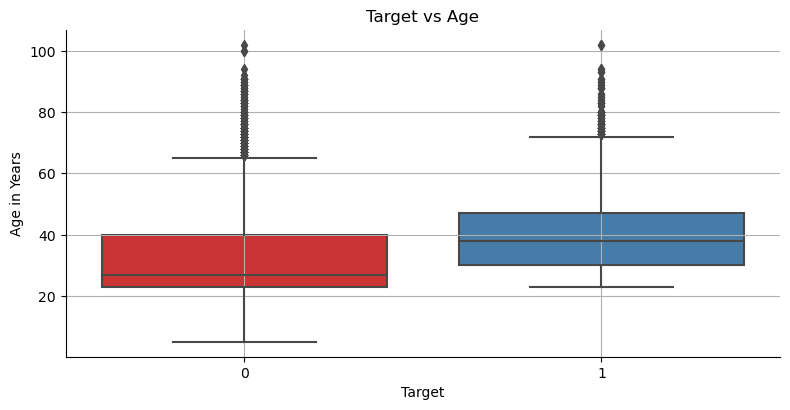

In [37]:
numeric_categorical_plot(df, 'age', 'TARGET', 'Target vs Age', 'Age in Years', 'Target')

The data shows a clear age difference between customers who purchase the new product and those who don't. The median age of buyers is significantly higher, suggesting a potential correlation between age and purchase decision.

### TARGET vs City

In [38]:
# We create a cross table
trgt_city = categorical_categorical_summary(df, 'TARGET', 'city', 1).reset_index()

# Show the results
trgt_city

city,TARGET,-999999,0,1,2,3,4,5,6,7,...,174,177,178,187,191,197,209,219,229,235
0,0,60.0,53.846154,21.428571,56.982507,66.666667,57.894737,73.333333,63.636364,46.666667,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,1,40.0,46.153846,78.571429,43.017493,33.333333,42.105263,26.666667,36.363636,53.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


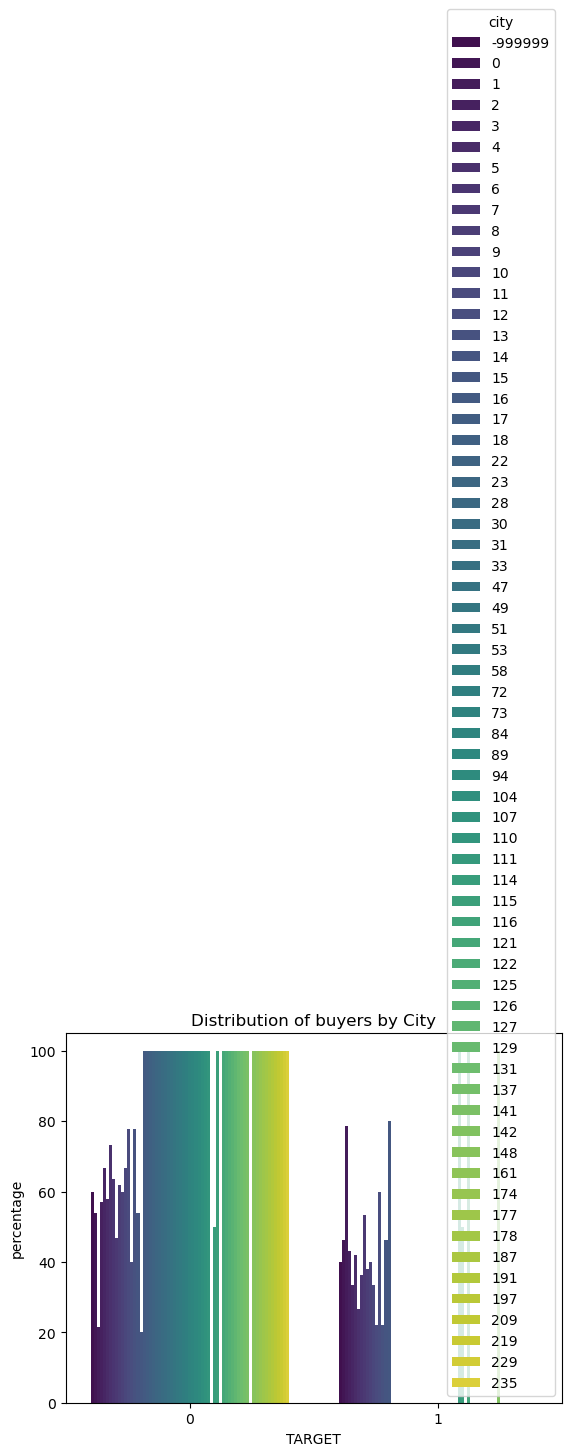

In [39]:
# We melt the normalized table to later plot it
trgt_city_melted = trgt_city.melt(id_vars=["TARGET"], var_name="city", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_city_melted, 'TARGET', 'city', 'percentage', 'Distribution of buyers by City')

### TARGET vs Age of Partner

In [40]:
numeric_categorical_summary(df, 'age_P', 'TARGET')

TARGET,0,1
count,8000.000000,6016.000000
mean,33.027125,39.680519
std,12.934848,12.019518
min,5.000000,23.000000
25%,23.000000,30.000000
50%,27.000000,38.000000
75%,40.000000,47.000000
max,102.000000,102.000000


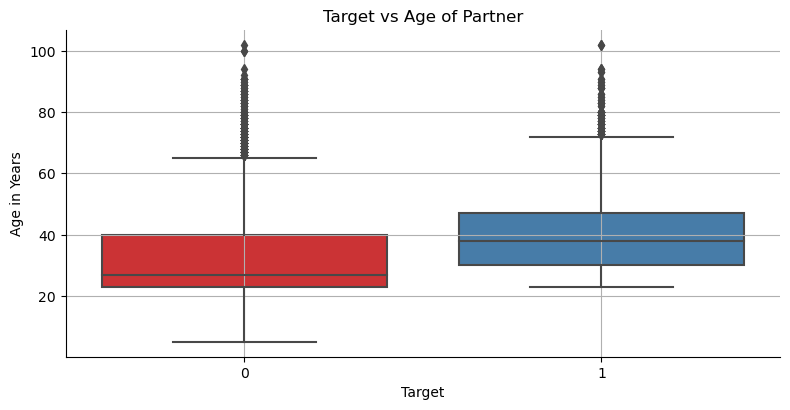

In [41]:
numeric_categorical_plot(df, 'age_P', 'TARGET', 'Target vs Age of Partner', 'Age in Years', 'Target')

The data with a target of 0 has a lower age range, around 20 to 60, while the data with a target of 1 has a higher age range, around 40 to 80. This means that people with a goal of 1 tend to choose older partners, while people with a goal of 0 tend to choose younger partners. The age distribution of the data with a target of 0 is more uniform and the length of the box plot is shorter, while the age distribution of the data with a target of 1 is more concentrated and the length of the box plot is longer. This shows that people with a goal of 1 have a clear preference for the age of their partners, while people with a goal of 0 do not have much restrictions on the age of their partners. Both sets of data have some outliers, small black dots, which represent data whose age does not match the target.

### TARGET vs Length of Relationship(Years)

In [42]:
numeric_categorical_summary(df, 'LOR', 'TARGET')

TARGET,0,1
count,8000.000000,6016.000000
mean,1.081375,0.720080
std,0.883799,1.028328
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,6.000000,5.000000


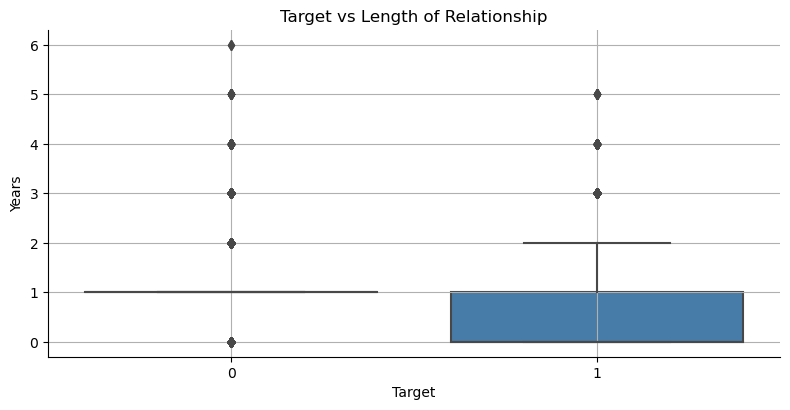

In [43]:
numeric_categorical_plot(df, 'LOR', 'TARGET', 'Target vs Length of Relationship', 'Years', 'Target')

There is a certain correlation between the target variable and relationship length. When the target variable is 1, both the mean and median relationship years are higher, and when the target variable is 0, the mean and median relationship years are both lower. This may indicate that there is a positive relationship between the target variable and relationship years, that is, the longer the relationship years, the more likely the target variable is to be 1, and vice versa.

### TARGET vs  Length of Relationship(Months)

In [44]:
numeric_categorical_summary(df, 'lor_M', 'TARGET')

TARGET,0,1
count,8000.000000,6016.000000
mean,15.976500,11.640957
std,10.605589,12.339938
min,3.000000,3.000000
25%,15.000000,3.000000
50%,15.000000,3.000000
75%,15.000000,15.000000
max,75.000000,63.000000


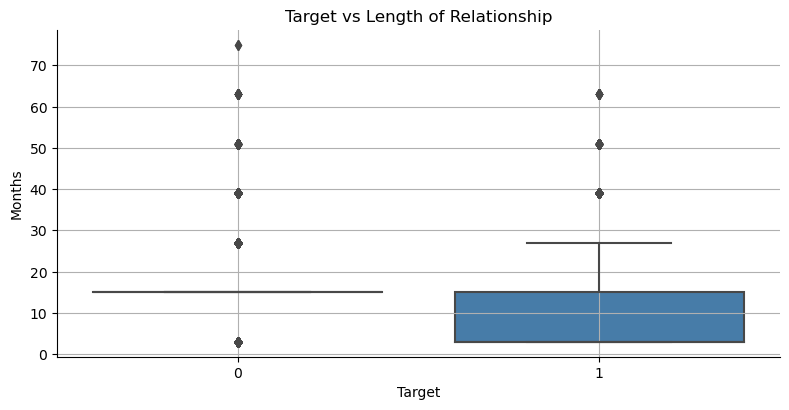

In [45]:
numeric_categorical_plot(df, 'lor_M', 'TARGET', 'Target vs Length of Relationship', 'Months', 'Target')

From the box plot, it can be observed that the median length of the relationship months for samples in category 1 is about 10, the interquartile range is about 15, the maximum value is about 40, the minimum value is about 0, and there are two The outliers are around 60 and 70. Taken together, compared to category 0, samples of category 1 tend to be distributed in a lower relationship month length interval, and in the box plot, the relationship month length of category 1 is overall more concentrated, and there are some abnormalities. value.

### TARGET vs Bought Product A

In [46]:
# We create a cross table
trgt_prodA = categorical_categorical_summary(df, 'TARGET', 'prod_A', 1).reset_index()

# Show the results
trgt_prodA

prod_A,TARGET,0,1
0,0,40.036731,71.959369
1,1,59.963269,28.040631


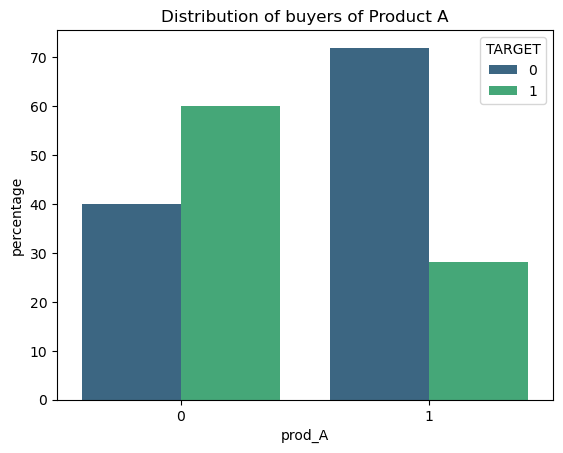

In [47]:
# We melt the normalized table to later plot it
trgt_prodA_melted = trgt_prodA.melt(id_vars=["TARGET"], var_name="prod_A", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_prodA_melted, 'prod_A', 'TARGET', 'percentage', 'Distribution of buyers of Product A')

Among the customers who purchased the product, the number of customers who did not purchase product A was greater than the number of customers who purchased product A.

### TARGET vs Type of Product A

In [48]:
# We create a cross table
trgt_typeA = categorical_categorical_summary(df, 'TARGET', 'type_A', 1).reset_index()

# Show the results
trgt_typeA

type_A,TARGET,0,3,6
0,0,40.036731,72.034353,53.333333
1,1,59.963269,27.965647,46.666667


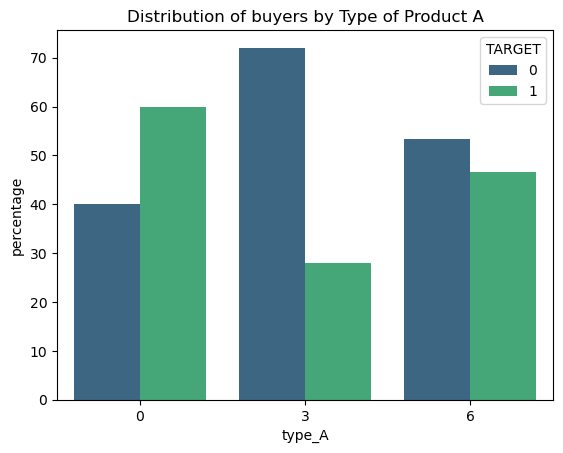

In [49]:
# We melt the normalized table to later plot it
trgt_typeA_melted = trgt_typeA.melt(id_vars=["TARGET"], var_name="type_A", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_typeA_melted, 'type_A', 'TARGET', 'percentage', 'Distribution of buyers by Type of Product A')

Customers who bought type_A 0 are most likely to buy the new product, with 59.96% purchasing it. Customers who bought type_A 3 are least likely to buy the new product, with only 27.97% purchasing it. The purchase rate for type_A 6 falls in between, at 46.67%. This might be a predictor of future purchase behavior for these product types.

### TARGET vs Turnover of Product A

In [50]:
numeric_categorical_summary(df, 'turnover_A', 'TARGET')

TARGET,0,1
count,8000.000000,6016.000000
mean,360.368141,404.152250
std,102.344612,70.433078
min,300.095909,300.251622
25%,328.165143,352.492444
50%,354.201977,402.683750
75%,379.535256,451.735184
max,5568.784139,1842.642216


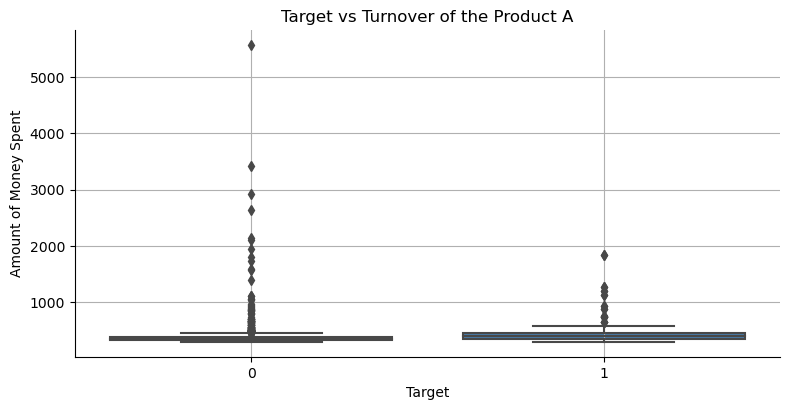

In [51]:
numeric_categorical_plot(df, 'turnover_A', 'TARGET', 'Target vs Turnover of the Product A', 'Amount of Money Spent', 'Target')

As can be seen, the median turnover_A with a target variable of 1 is higher than the median with a target variable of 0 and shows a wider range of data distribution. At the same time, there are some higher turnover_A anomalies with a target variable of 0 that may represent specific extremes. This suggests a possible correlation between Target and turnover_A.

### TARGET vs Bought Product B

In [52]:
# We create a cross table
trgt_prodB = categorical_categorical_summary(df, 'TARGET', 'prod_B', 1).reset_index()

# Show the results
trgt_prodB

prod_B,TARGET,0,1
0,0,36.373352,70.911688
1,1,63.626648,29.088312


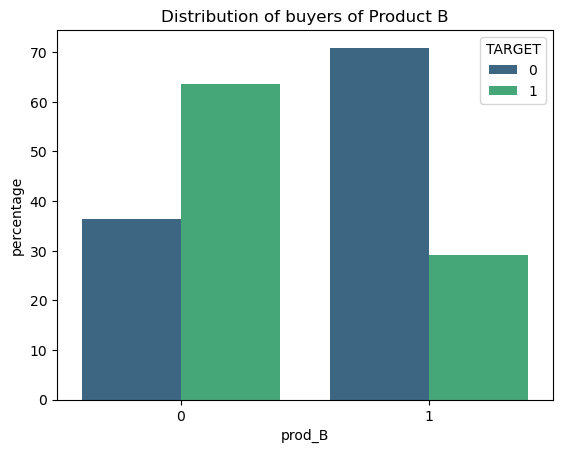

In [53]:
# We melt the normalized table to later plot it
trgt_prodB_melted = trgt_prodB.melt(id_vars=["TARGET"], var_name="prod_B", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_prodB_melted, 'prod_B', 'TARGET', 'percentage', 'Distribution of buyers of Product B')

Among the customers who purchased product, the number of customers who purchased product B was greater than the number of customers who did not purchase product B.

### TARGET vs Type of Product B

In [54]:
# We create a cross table
trgt_typeB = categorical_categorical_summary(df, 'TARGET', 'type_B', 1).reset_index()

# Show the results
trgt_typeB

type_B,TARGET,0,3,6,9
0,0,36.373352,70.05334,83.36714,88.571429
1,1,63.626648,29.94666,16.63286,11.428571


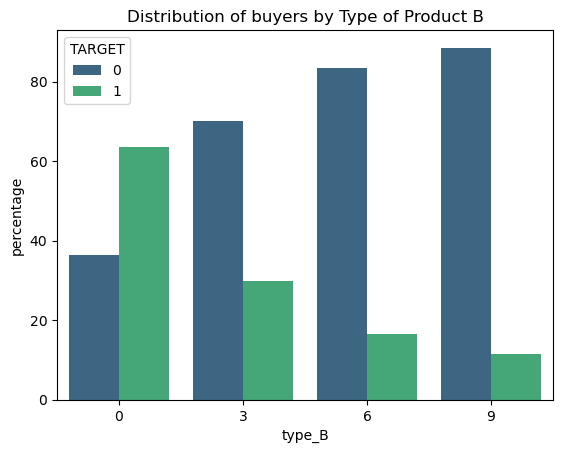

In [55]:
# We melt the normalized table to later plot it
trgt_typeB_melted = trgt_typeB.melt(id_vars=["TARGET"], var_name="type_B", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_typeB_melted, 'type_B', 'TARGET', 'percentage', 'Distribution of buyers by Type of Product B')

Customers who bought type_B 0 are most likely to buy the new product, with 63.63% purchasing it. Customers who bought type_B 9 are least likely to buy the new product, with only 11.43% purchasing it. The purchase rate for the other product types falls in between. This might be a predictor of future purchase behavior for these product types.

The significant disparity in purchase rates between type_B 0 (63.63%) and other type_B products suggests that choosing product B 0 or not could be a strong predictor of future purchases of the new product.

### TARGET vs Turnover of Product B

In [56]:
numeric_categorical_summary(df, 'turnover_B', 'TARGET')

TARGET,0,1
count,8000.000000,6016.000000
mean,371.263176,271.932769
std,599.360503,209.088517
min,191.962852,193.458345
25%,216.488700,227.224317
50%,231.246011,253.679856
75%,245.359604,277.970096
max,12249.084770,5270.990010


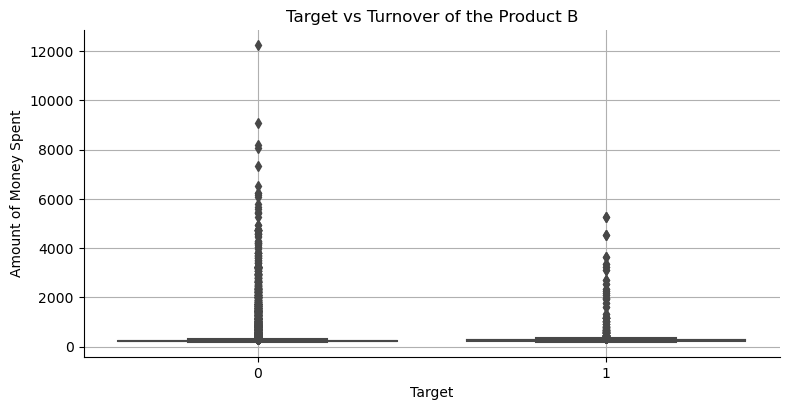

In [57]:
numeric_categorical_plot(df, 'turnover_B', 'TARGET', 'Target vs Turnover of the Product B', 'Amount of Money Spent', 'Target')

As can be seen, the median turnover_B seems to be higher when the target variable is 1 than when the target variable is 0. At the same time, there are some higher turnover_B outliers with a target variable of 0. This suggests that turnover_B may show a wider range of distribution when the target variable is zero. These observations imply that there may be some correlation between TARGET and turnover_B.

## Correlation Analysis

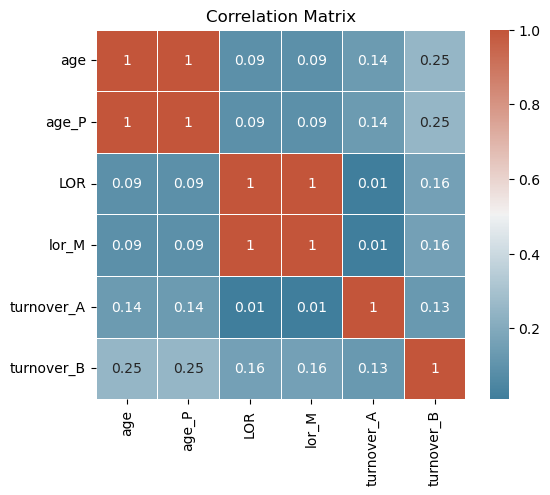

In [58]:
# Numeric Columns
numeric_cols = ['age', 
                'age_P', 
                'LOR', 
                'lor_M', 
                'turnover_A', 
                'turnover_B']

# Select numeric columns from the dataframe
numeric_df = df[numeric_cols]

# Create a correlation matrix

# Plot title
plt.title("Correlation Matrix")

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, linewidths=.5, cmap=cmap, square = True)

# Display the plot
plt.show()

As can be seen, 'Age' and 'Age of Partner' are highly correlated. Therefore, when it comes to feature selection, we can choose just 'Age'.

Similarly, 'Length of Relationship in Months' and 'Length of Relationship in Years' have a correlation of 1, indicating that they are perfectly correlated. For the purposes of this study, we will select just one of these variables.

# Data Preparation

Let's store the dataframe before the data preparation

In [59]:
df_old = df

## Data Cleaning

First we will delete duplicates in the dataset and the non-explanatory variables such as ID and Contract

In [60]:
df = df.drop_duplicates()
df= df.drop(columns = ['ID','contract'])

## Feature Selection

Now, we will drop the highly correlated numeric features.

In [61]:
df = df.drop(columns = ['age_P','LOR'])

We will also drop the variable 'city' since 97.89% of its instances are the same.

In [62]:
df = df.drop(columns = ['city'])

## Feature Engineering

Since there are no substantial differences between the loyalty levels, but there's a noticeable difference with those that have an unclassified loyalty level, we will transform this into a binary variable, where 1 represents a loyalty level between 0 and 3, and 0 represents an unclassified loyalty level.

Only 0.21% of instances are of type 6 of product A, and the distribution of customers who bought the product, given that they received product A type 3 or product A type 6, versus those who received product A type 0, is very different. Thus, we will transform the variable 'type_A' into a binary variable that takes the value of 0 when the product is 0 and the value of 1 when it's either 3 or 6.

The percentage of customers that bought the new product, given that they bought the product B type 3, 6, or 9, is similar, around 70% to 90%, not buying the new product. In contrast, the customers that bought the product B type 0, of which almost 64% bought the new product. Thus, we will transform 'type_B' into a binary column, with the value of 0 if the customer bought the product B type 0 and 1 in all other cases.

In [63]:
# Map the loyalty column to binary values
df['loyalty'] = df['loyalty'].map({99: 0,0: 1,1: 1,2: 1,3: 1})

# Map the type A column to binary values
df['type_A'] = df['type_A'].map({0: 0,3: 1,6: 1})

# Map the type B column to binary values
df['type_B'] = df['type_B'].map({0: 0,3: 1,6: 1,9: 1})

Here's the final dataset to work with

In [64]:
df

,TARGET,loyalty,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,0,66,0,0,0,0,333.561114,264.721010,3
1,1,1,45,1,1,1,1,394.735699,284.904978,39
2,1,1,42,1,1,1,1,342.180990,1175.589721,27
3,1,0,31,0,0,0,0,453.757916,242.341754,3
4,1,0,62,0,0,0,0,384.577469,287.008370,3
...,...,...,...,...,...,...,...,...,...,...
11003,0,1,33,1,1,1,1,302.380331,229.457986,27
11004,0,0,23,0,0,0,0,316.268616,228.518505,3
11005,0,1,23,1,1,1,1,385.871241,236.665515,27
11006,0,0,32,1,1,1,1,317.578868,226.899614,15


# Prepped Data Review

## TARGET

In [65]:
categorical_eda_summary(df, 'TARGET')

,Category,Count,Percentage of Total
0,0,8000,72.67
1,1,3008,27.33


As we can see, after data cleaning, this dataset has a high imbalance in the target variable, with 73% of cases being customers that didn't buy the product and only 27% of those that bought the product. We need to address this issue when building the classification model.

## TARGET vs Loyalty

In [66]:
# We create a cross table
trgt_loyalty = categorical_categorical_summary(df, 'TARGET', 'loyalty', 1).reset_index()

# Show the results
trgt_loyalty

loyalty,TARGET,0,1
0,0,61.608558,82.04698
1,1,38.391442,17.95302


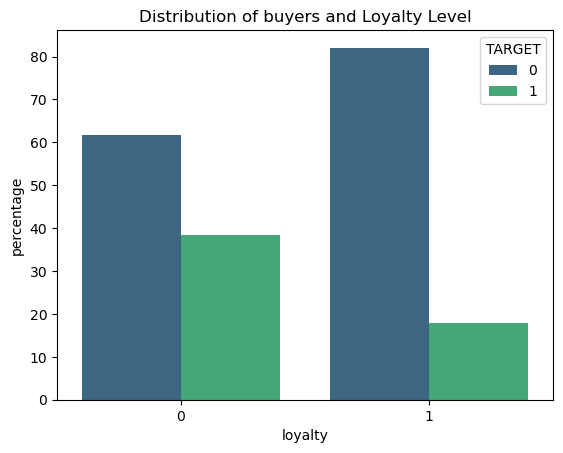

In [67]:
# We melt the normalized table to later plot it
trgt_loyalty_melted = trgt_loyalty.melt(id_vars=["TARGET"], var_name="loyalty", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_loyalty_melted, 'loyalty', 'TARGET', 'percentage', 'Distribution of buyers and Loyalty Level')

Previously, loyalty levels were divided into 0, 1, 2, 3 and 99. As loyalty levels increase, the percentage purchasing additional insurance products shows an irregular trend, fluctuating from loyalty levels 0 to 3, and increasing slightly at loyalty level 99.

After data collation, we redefined loyalty level 99 as 0, and loyalty levels 0, 1, 2 and 3 as 1. As loyalty levels increase, the percentage purchasing additional insurance products shows a more pronounced downward trend. The percentage of purchasing additional insurance products drops sharply from loyalty level 0 to 1, indicating that at lower levels of loyalty, customers are more inclined to purchase additional insurance products. This is contrary to the trend before the data was collated, but in this case we don't see an increase at the highest loyalty levels.

## TARGET vs Age

In [68]:
numeric_categorical_summary(df, 'age', 'TARGET')

TARGET,0,1
count,8000.000000,3008.000000
mean,33.027125,39.680519
std,12.934848,12.020518
min,5.000000,23.000000
25%,23.000000,30.000000
50%,27.000000,38.000000
75%,40.000000,47.000000
max,102.000000,102.000000


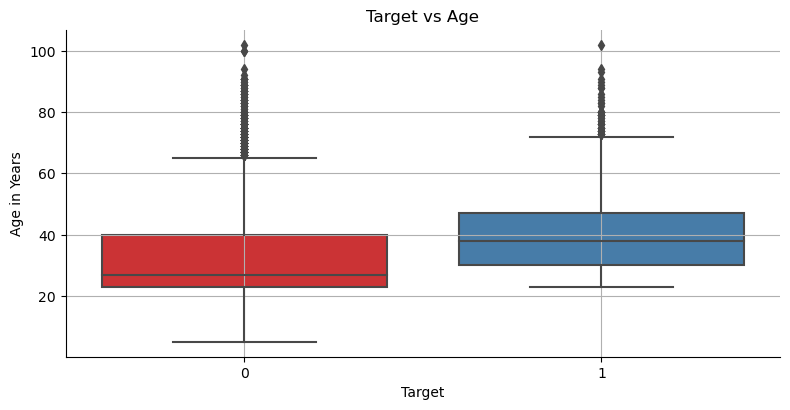

In [69]:
numeric_categorical_plot(df, 'age', 'TARGET', 'Target vs Age', 'Age in Years', 'Target')

After removing duplicate rows, the number of samples with a target variable of 1 is reduced to 3008, which is about 3008 fewer samples than before. Other statistical indicators such as mean, standard deviation, quantile, etc. remain unchanged, indicating that the distribution characteristics of the data have not changed, but only the number of samples has changed.

## TARGET vs Length of Relationship(Months)

In [70]:
numeric_categorical_summary(df, 'lor_M', 'TARGET')

TARGET,0,1
count,8000.000000,3008.000000
mean,15.976500,11.640957
std,10.605589,12.340963
min,3.000000,3.000000
25%,15.000000,3.000000
50%,15.000000,3.000000
75%,15.000000,15.000000
max,75.000000,63.000000


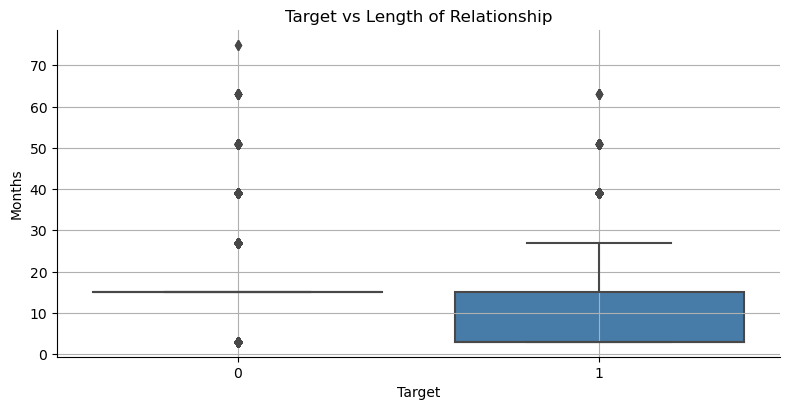

In [71]:
numeric_categorical_plot(df, 'lor_M', 'TARGET', 'Target vs Length of Relationship', 'Months', 'Target')

After removing duplicate rows, the number of samples with a target variable of 1 is reduced to 3008, which is about 3008 fewer samples than before. Other statistical indicators such as mean, standard deviation, quantile, etc. remain unchanged, indicating that the distribution characteristics of the data have not changed, but only the number of samples has changed.

## TARGET vs Bought Product A

In [72]:
# We create a cross table
trgt_prodA = categorical_categorical_summary(df, 'TARGET', 'prod_A', 1).reset_index()

# Show the results
trgt_prodA

prod_A,TARGET,0,1
0,0,57.180328,83.693456
1,1,42.819672,16.306544


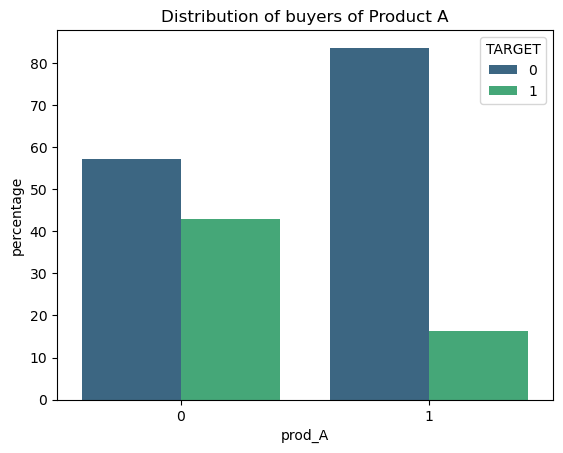

In [73]:
# We melt the normalized table to later plot it
trgt_prodA_melted = trgt_prodA.melt(id_vars=["TARGET"], var_name="prod_A", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_prodA_melted, 'prod_A', 'TARGET', 'percentage', 'Distribution of buyers of Product A')

Before data collation, in the case of purchasing additional insurance products (TARGET is 1), the percentage of non-purchasing product A (TARGET is 0) is approximately 40.04%, while the percentage of purchasing product A is approximately 71.96%. However, after data collation, the percentage of non-purchase of product A increased from approximately 40.04% to approximately 57.18%, while the percentage of purchase of product A decreased from approximately 71.96% to approximately 42.82%.

To sum up, customers who have previously purchased additional insurance products are more likely to purchase Product A. After collating the data, customers who purchase additional insurance products are more likely not to purchase Product A.

## TARGET vs Type of Product A

In [74]:
# We create a cross table
trgt_typeA = categorical_categorical_summary(df, 'TARGET', 'type_A', 1).reset_index()

# Show the results
trgt_typeA

type_A,TARGET,0,1
0,0,57.180328,83.693456
1,1,42.819672,16.306544


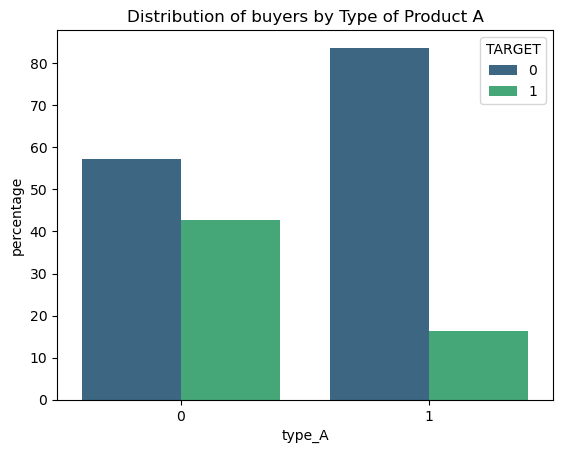

In [75]:
# We melt the normalized table to later plot it
trgt_typeA_melted = trgt_typeA.melt(id_vars=["TARGET"], var_name="type_A", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_typeA_melted, 'type_A', 'TARGET', 'percentage', 'Distribution of buyers by Type of Product A')

After sorting the data, we redefined customers of type 3 and 6 as 1. In the case of purchasing additional insurance products, the proportion of customers with type 0 increased from approximately 40.04% to approximately 57.18%, while the proportion of customers with types 3 and 6 decreased from approximately 72.03% and 53.33% to approximately 42.82% and 16.31% %.

These data changes indicate that customers in type 3 and 6 are more likely not to purchase additional insurance products, while customers in type 0 are more inclined to purchase additional insurance products.

## TARGET vs Turnover of Product A

In [76]:
numeric_categorical_summary(df, 'turnover_A', 'TARGET')

TARGET,0,1
count,8000.000000,3008.000000
mean,360.368141,404.152250
std,102.344612,70.438934
min,300.095909,300.251622
25%,328.165143,352.492444
50%,354.201977,402.683750
75%,379.535256,451.735184
max,5568.784139,1842.642216


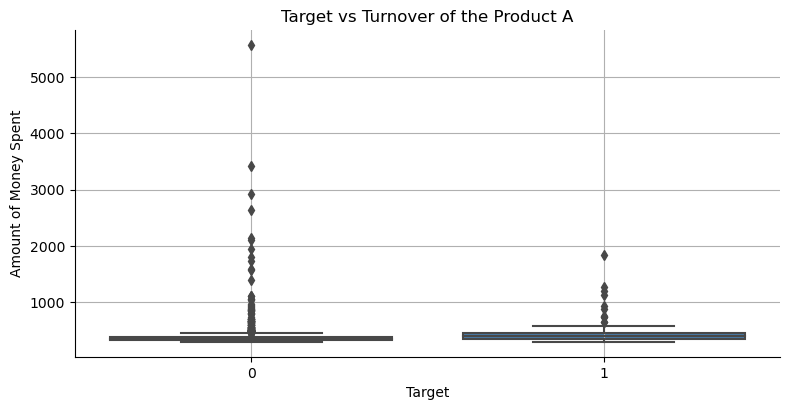

In [77]:
numeric_categorical_plot(df, 'turnover_A', 'TARGET', 'Target vs Turnover of the Product A', 'Amount of Money Spent', 'Target')

After removing duplicate rows, the number of samples with a target variable of 1 is reduced to 3008, which is about 3008 fewer samples than before. Other statistical indicators such as mean, standard deviation, quantile, etc. remain unchanged, indicating that the distribution characteristics of the data have not changed, but only the number of samples has changed.

## TARGET vs Bought Product B

In [78]:
# We create a cross table
trgt_prodB = categorical_categorical_summary(df, 'TARGET', 'prod_B', 1).reset_index()

# Show the results
trgt_prodB

prod_B,TARGET,0,1
0,0,53.343783,82.980501
1,1,46.656217,17.019499


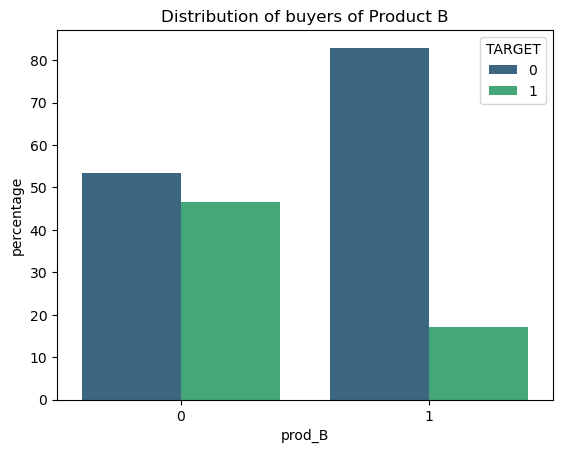

In [79]:
# We melt the normalized table to later plot it
trgt_prodB_melted = trgt_prodB.melt(id_vars=["TARGET"], var_name="prod_B", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_prodB_melted, 'prod_B', 'TARGET', 'percentage', 'Distribution of buyers of Product B')

We've seen some significant changes. In the case of purchasing additional insurance products, the proportion of customers who did not purchase Product B increased from approximately 36.37% to approximately 53.34%, while the proportion of customers who purchased Product B decreased from approximately 70.91% to approximately 46.66%. These data changes show that after data collation, customers who purchased additional insurance products were more likely not to purchase product B, whereas before data collation, customers who purchased additional insurance products were more likely to purchase product B.

## TARGET vs Type of Product B

In [80]:
 # We create a cross table
trgt_typeB = categorical_categorical_summary(df, 'TARGET', 'type_B', 1).reset_index()

# Show the results
trgt_typeB

type_B,TARGET,0,1
0,0,53.343783,82.980501
1,1,46.656217,17.019499


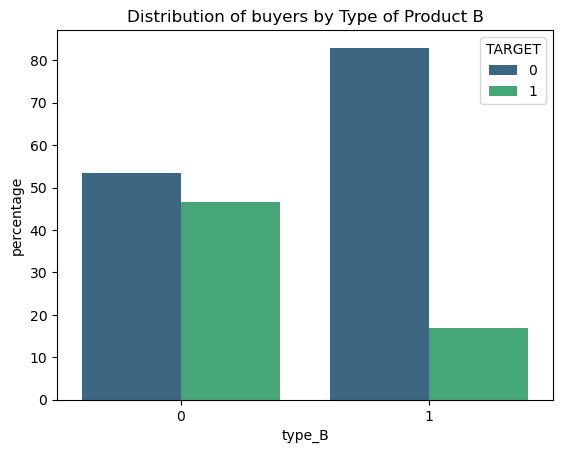

In [81]:
# We melt the normalized table to later plot it
trgt_typeB_melted = trgt_typeB.melt(id_vars=["TARGET"], var_name="type_B", value_name="percentage")

# Create a bar plot using Seaborn
categorical_categorical_numerical_plot(trgt_typeB_melted, 'type_B', 'TARGET', 'percentage', 'Distribution of buyers by Type of Product B')

We redefine customers of type 3, 6, and 9 to 1, while customers of type 0 remain unchanged at 0. In this case, we observe that with the purchase of additional insurance products, the proportion of customers with type 0 increased from approximately 36.37% to approximately 53.34%, while the proportion of customers with types 3, 6 and 9 increased from approximately 36.37% to approximately 53.34%. 70.05%, 83.37% and 88.57% dropped to approximately 46.66%, 82.98% and 17.02%.

These data changes show that after data collation, customers with types 3, 6 and 9 are more likely not to purchase additional insurance products, while customers with type 0 are more inclined to purchase additional insurance products.

## TARGET vs Turnover of Product B

In [82]:
numeric_categorical_summary(df, 'turnover_B', 'TARGET')

TARGET,0,1
count,8000.000000,3008.000000
mean,371.263176,271.932769
std,599.360503,209.105900
min,191.962852,193.458345
25%,216.488700,227.224317
50%,231.246011,253.679856
75%,245.359604,277.970096
max,12249.084770,5270.990010


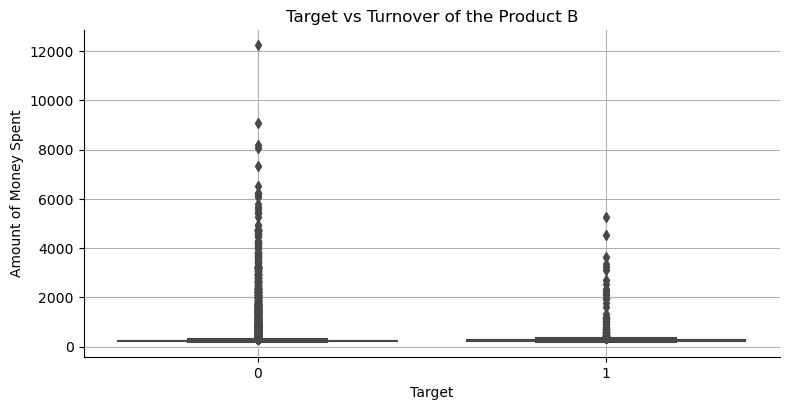

In [83]:
numeric_categorical_plot(df, 'turnover_B', 'TARGET', 'Target vs Turnover of the Product B', 'Amount of Money Spent', 'Target')

After removing duplicate rows, the number of samples with a target variable of 1 is reduced to 3008, which is about 3008 fewer samples than before. Other statistical indicators such as mean, standard deviation, quantile, etc. remain unchanged, indicating that the distribution characteristics of the data have not changed, but only the number of samples has changed.

# KNN + SVM Modeling

We will construct 2 KNN models and 2 SVM models:

- **Model 1:** KNN model with an unmodified dataset
- **Model 2:** KNN model with all predictive features scaled and resampled
- **Model 3:** SVM model with an unmodified dataset
- **Model 4:** SVM model with all predictive features scaled and resampled

In [84]:
# Let's import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC

## Model 1 - KNN - Unmodified Dataset

In [85]:
# Split the data into training and test sets
X1 = df[['loyalty',
         'age',
         'prod_A',
         'type_A',
         'type_B',
         'prod_B',
         'turnover_A',
         'turnover_B',
         'lor_M']]
y1 = df['TARGET']

# Create the test and train sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

######## KNN ########

# Calculate the square root of the number of samples in the training dataset
k = int(np.sqrt(len(X1_train)))

# Ensure k is odd to avoid ties
k = k if k % 2 != 0 else k + 1

# Train the k-Nearest Neighbors (kNN) classifier
model1 = KNeighborsClassifier(n_neighbors = k)
model1.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model1.predict(X1_test)

## Model 2 - KNN - Scaled and Resampled Dataset

In [86]:
# Split the data into training and test sets
X2 = df[['loyalty',
         'age',
         'prod_A',
         'type_A',
         'type_B',
         'prod_B',
         'turnover_A',
         'turnover_B',
         'lor_M']]
y2 = df['TARGET']

# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

######## Resampling ########

# Concatenate the features and target variable for the training set
train_data_2 = pd.concat([X2_train, y2_train], axis=1)

# Separate majority and minority classes
class_0 = train_data_2[train_data_2['TARGET'] == 0]
class_1 = train_data_2[train_data_2['TARGET'] == 1]

# Downsample the majority class to match the number of samples in the minority class
class_0_downsampled = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)

# Combine the downsampled majority class with the minority class
balanced_train_data = pd.concat([class_0_downsampled, class_1])

# Shuffle the rows
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the features and target variable for the balanced training set
X2_train = balanced_train_data.drop('TARGET', axis=1)
y2_train = balanced_train_data['TARGET']

######## Scaling ########

# Scale the input features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

######## KNN ########

# Calculate the square root of the number of samples in the training dataset
k = int(np.sqrt(len(X2_train)))

# Ensure k is odd to avoid ties
k = k if k % 2 != 0 else k + 1

# Train the k-Nearest Neighbors (kNN) classifier
model2 = KNeighborsClassifier(n_neighbors = k)
model2.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model2.predict(X2_test)

## Model 3 - SVM - Unmodified Dataset

In [87]:
# Split the data into training and test sets
X3 = df[['loyalty',
         'age',
         'prod_A',
         'type_A',
         'type_B',
         'prod_B',
         'turnover_A',
         'turnover_B',
         'lor_M']]
y3 = df['TARGET']

# Split the data into training and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

######## SVM ########

# Train the SVM model
model3 = SVC()
model3.fit(X3_train, y3_train)

# Make predictions on the test set
y3_pred = model3.predict(X3_test)

## Model 4 - SVM - Scaled and Resampled Dataset

In [88]:
# Split the data into training and test sets
X4 = df[['loyalty',
         'age',
         'prod_A',
         'type_A',
         'type_B',
         'prod_B',
         'turnover_A',
         'turnover_B',
         'lor_M']]
y4 = df['TARGET']

# Split the data into training and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

######## Resampling ########

# Concatenate the features and target variable for the training set
train_data_4 = pd.concat([X4_train, y4_train], axis=1)

# Separate majority and minority classes
class_0 = train_data_4[train_data_4['TARGET'] == 0]
class_1 = train_data_4[train_data_4['TARGET'] == 1]

# Downsample the majority class to match the number of samples in the minority class
class_0_downsampled = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)

# Combine the downsampled majority class with the minority class
balanced_train_data = pd.concat([class_0_downsampled, class_1])

# Shuffle the rows
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the features and target variable for the balanced training set
X4_train = balanced_train_data.drop('TARGET', axis=1)
y4_train = balanced_train_data['TARGET']

######## Scaling ########

# Scale the input features
scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)

######## SVM ########

# Train the SVM model
model4 = SVC()
model4.fit(X4_train, y4_train)

# Make predictions on the test set
y4_pred = model4.predict(X4_test)

# Model Selection

In [90]:
# Generic function for calculting metrics
# Import the necessary packages
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
def metrics(actual, predicted):
    # Scikit-learn functions
    # Accuracy
    accuracy_sklearn = accuracy_score(actual, predicted)
    # Precision
    precision_sklearn = precision_score(actual, predicted)
    # Sensitivity
    sensitivity_sklearn = recall_score(actual, predicted)  # Recall is equivalent to sensitivity
    # Specificity
    specificity_sklearn = recall_score(actual, predicted, pos_label=0)  # Specificity is calculated for the negative class
    # F1 Score
    f1_score_sklearn = f1_score(actual, predicted)
    # Classification report
    classification_report_sklearn = classification_report(actual, predicted)
    # Print all the metrics
    print("Accuracy:", round(accuracy_sklearn*100,2), "%")
    print("Precision:", round(precision_sklearn*100,2), "%")
    print("Sensitivity (Recall):", round(sensitivity_sklearn*100,2), "%")
    print("Specificity:", round(specificity_sklearn*100,2), "%")
    print("F1 Score:", round(f1_score_sklearn*100,2), "%")
    print("\nClassification Report:\n")
    print(classification_report_sklearn)
    
def print_confusion_matrix_info(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

## Model 1 - KNN - Unmodified Dataset

In [91]:
# Confusion matrix for model 1
conf_matrix_model1 = confusion_matrix(y1_test, y1_pred)
print_confusion_matrix_info(conf_matrix_model1)

True Positives (TP): 400
False Positives (FP): 54
False Negatives (FN): 201
True Negatives (TN): 1547


In [92]:
# Metrics for model 1
metrics(y1_test, y1_pred)

Accuracy: 88.42 %
Precision: 88.11 %
Sensitivity (Recall): 66.56 %
Specificity: 96.63 %
F1 Score: 75.83 %

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1601
           1       0.88      0.67      0.76       601

    accuracy                           0.88      2202
   macro avg       0.88      0.82      0.84      2202
weighted avg       0.88      0.88      0.88      2202



- **Accuracy:** 88.42%
- **Precision:** 88.11%
- **Sensitivity (Recall):** 66.56%
- **Specificity:** 96.63%
- **F1 Score:** 75.83%
- **Null Error Rate**: 72.67%

**Accuracy:** The proportion of correct predictions among the total number of predictions. In this case, it's 88.42%, indicating that 88.42% of the predictions were correct.

**Precision:** The proportion of true positive predictions among all positive predictions. It measures the accuracy of the positive predictions. In this case, it's 88.11%.

**Sensitivity (Recall):** The proportion of true positive predictions among all actual positive instances. It measures the model's ability to identify all positive instances. Here, it's 66.56%.

**Specificity:** The proportion of true negative predictions among all actual negative instances. It measures the model's ability to identify all negative instances. Here, it's 96.63%.

**F1 Score:** The harmonic mean of precision and recall. It balances between precision and recall. Here, it's 75.83%.

The classification report provides a detailed breakdown of these metrics for each class (0 and 1), including precision, recall, and F1-score, along with support (the number of true instances for each class).

Overall, the model seems to perform reasonably well, with high accuracy and specificity, but slightly lower sensitivity.

In [93]:
# Cross validation for model 1
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_model1 = cross_validate(model1, X1_train, y1_train, cv=10, scoring=scoring)

# Print the cross-validation scores
for key, scores in scores_model1.items():
    print(key + ':', round(scores.mean(),4)) 

fit_time: 0.0173
score_time: 0.0521
test_accuracy: 0.8839
test_precision_macro: 0.8863
test_recall_macro: 0.8132
test_f1_macro: 0.8398


- **fit_time:** 0.0176
- **score_time:** 0.0639
- **test_accuracy:** 0.8839
- **test_precision_macro:** 0.8863
- **test_recall_macro:** 0.8132
- **test_f1_macro:** 0.8398

**Fit Time:** The fit time represents the time taken by the model to learn from the training data. In this case, it took approximately 0.0176 seconds.

**Score Time:** The score time refers to the time taken by the model to make predictions on the validation data (test set). Here, it took around 0.0639 seconds.

**Test Accuracy:** The test accuracy measures how well the model performs on the test set. It’s calculated as the ratio of correct predictions to the total number of instances. In your case, the accuracy is 88.39%, which indicates that the model correctly predicts the class labels for about 88.39% of the instances.

**Test Precision (Macro):** Precision is the proportion of true positive predictions out of all positive predictions. The macro-averaged precision for your model is 88.63%. Higher precision means fewer false positives.

**Test Recall (Macro):** Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances. The macro-averaged recall is 81.32%. Higher recall means fewer false negatives.

**Test F1 Score (Macro):** The F1 score balances precision and recall. The macro-averaged F1 score for your model is 83.98%. It provides a combined view of precision and recall.


The model demonstrates good overall performance, with high accuracy and reasonable precision and recall. The F1 score indicates a balance between precision and recall, which is essential for a well-rounded model

## Model 2 - KNN - Scaled and Resampled Dataset

In [94]:
# Confusion matrix for model 2
conf_matrix_model2 = confusion_matrix(y2_test, y2_pred)
print_confusion_matrix_info(conf_matrix_model2)

True Positives (TP): 450
False Positives (FP): 304
False Negatives (FN): 151
True Negatives (TN): 1297


In [95]:
# Metrics for model 2
metrics(y2_test, y2_pred)

Accuracy: 79.34 %
Precision: 59.68 %
Sensitivity (Recall): 74.88 %
Specificity: 81.01 %
F1 Score: 66.42 %

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1601
           1       0.60      0.75      0.66       601

    accuracy                           0.79      2202
   macro avg       0.75      0.78      0.76      2202
weighted avg       0.81      0.79      0.80      2202



- **Accuracy:** 79.34%
- **Precision:** 59.68%
- **Sensitivity (Recall):** 74.88%
- **Specificity:** 81.01%
- **F1 Score:** 66.42%
- **Null Error Rate**: 50.00%

**Accuracy:** 79.34% - This metric represents the proportion of correct predictions among the total number of predictions.

**Precision:** 59.68% - Precision measures the accuracy of positive predictions. It is the proportion of true positive predictions among all positive predictions.

**Sensitivity (Recall):** 74.88% - Recall measures the model's ability to identify all positive instances. It is the proportion of true positive predictions among all actual positive instances.

**Specificity:** 81.01% - Specificity measures the model's ability to identify all negative instances. It is the proportion of true negative predictions among all actual negative instances.

**F1 Score:** 66.42% - The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

The classification report provides a detailed breakdown of these metrics for each class (0 and 1), including precision, recall, and F1-score, along with support (the number of true instances for each class).

Overall, the model performs reasonably well, with a decent accuracy, but lower precision compared to the previous model.

In [96]:
# Cross validation for model 2
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_model2 = cross_validate(model2, X2_train, y2_train, cv=10, scoring=scoring)

# Print the cross-validation scores
for key, scores in scores_model2.items():
    print(key + ':', round(scores.mean(),4)) 

fit_time: 0.0076
score_time: 0.0337
test_accuracy: 0.7902
test_precision_macro: 0.7918
test_recall_macro: 0.7902
test_f1_macro: 0.7899


- **fit_time:** 0.0066
- **score_time:** 0.0367
- **test_accuracy:** 0.7902
- **test_precision_macro:** 0.7918
- **test_recall_macro:** 0.7902
- **test_f1_macro:** 0.7899

**fit_time:** This represents the time taken by the model to train on the training data. In this case, it's 0.0066 seconds.

**score_time:** This represents the time taken by the model to make predictions on the test data. In this case, it's 0.0367 seconds.

**test_accuracy:** This is the accuracy of the model on the test data during cross-validation. It's the proportion of correct predictions among the total number of predictions.

**test_precision_macro:** This is the macro-averaged precision across all classes. Macro-averaging calculates the metric independently for each class and then takes the average without considering class imbalance.

**test_recall_macro:** This is the macro-averaged recall across all classes. Similar to precision_macro, it calculates the recall independently for each class and then takes the average.

**test_f1_macro:** This is the macro-averaged F1 score across all classes. F1 macro takes the harmonic mean of precision and recall, calculated independently for each class, and then takes the average.

These metrics are useful for evaluating the performance of the model in a multi-class classification setting, particularly in scenarios where class imbalance is present. In this case, the model seems to perform reasonably well across all metrics.

## Model 3 - SVM - Unmodified Dataset

In [97]:
# Confusion matrix for model 3
conf_matrix_model3 = confusion_matrix(y3_test, y3_pred)
print_confusion_matrix_info(conf_matrix_model3)

True Positives (TP): 265
False Positives (FP): 66
False Negatives (FN): 336
True Negatives (TN): 1535


In [98]:
# Metrics for model 3
metrics(y3_test, y3_pred)

Accuracy: 81.74 %
Precision: 80.06 %
Sensitivity (Recall): 44.09 %
Specificity: 95.88 %
F1 Score: 56.87 %

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1601
           1       0.80      0.44      0.57       601

    accuracy                           0.82      2202
   macro avg       0.81      0.70      0.73      2202
weighted avg       0.82      0.82      0.80      2202



- **Accuracy:** 81.74%
- **Precision:** 80.06%
- **Sensitivity (Recall):** 44.09%
- **Specificity:** 95.88%
- **F1 Score:** 56.87%
- **Null Error Rate**: 72.67%

**Accuracy:** 81.74% - This is the proportion of correct predictions among the total number of predictions.

**Precision:** 80.06% - Precision measures the accuracy of positive predictions. It is the proportion of true positive predictions among all positive predictions.

**Sensitivity (Recall):** 44.09% - Recall measures the model's ability to identify all positive instances. It is the proportion of true positive predictions among all actual positive instances.

**Specificity:** 95.88% - Specificity measures the model's ability to identify all negative instances. It is the proportion of true negative predictions among all actual negative instances.

**F1 Score:** 56.87% - The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

The classification report provides a detailed breakdown of these metrics for each class (0 and 1), including precision, recall, and F1-score, along with support (the number of true instances for each class).

Overall, the model seems to have high accuracy and specificity but relatively lower recall. 

In [99]:
# Cross validation for model 3
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_model3 = cross_validate(model3, X3_train, y3_train, cv=10, scoring=scoring)


# Print the cross-validation scores
for key, scores in scores_model3.items():
    print(key + ':', round(scores.mean(),4))  

fit_time: 1.4802
score_time: 0.3001
test_accuracy: 0.8319
test_precision_macro: 0.8443
test_recall_macro: 0.7157
test_f1_macro: 0.7463


- **fit_time:** 1.8092
- **score_time:** 0.3264
- **test_accuracy:** 0.8319
- **test_precision_macro:** 0.8443
- **test_recall_macro:** 0.7157
- **test_f1_macro:** 0.7463

**fit_time:** This represents the time taken by the model to train on the training data. In this case, it's 1.8092 seconds.

**score_time:** This represents the time taken by the model to make predictions on the test data. In this case, it's 0.3264 seconds.

**test_accuracy:** This is the accuracy of the model on the test data during cross-validation. It's the proportion of correct predictions among the total number of predictions.

**test_precision_macro:** This is the macro-averaged precision across all classes. Macro-averaging calculates the metric independently for each class and then takes the average without considering class imbalance.

**test_recall_macro:** This is the macro-averaged recall across all classes. Similar to precision_macro, it calculates the recall independently for each class and then takes the average.

**test_f1_macro:** This is the macro-averaged F1 score across all classes. F1 macro takes the harmonic mean of precision and recall, calculated independently for each class, and then takes the average.

These metrics are useful for evaluating the performance of the model in a multi-class classification setting. In this case, the model seems to perform reasonably well across all metrics, with relatively high accuracy and precision_macro. However, the recall_macro and F1_macro are lower, indicating that the model may not perform as well in identifying all classes equally effectively.

## Model 4 - SVM - Scaled and Resampled Dataset

In [100]:
# Confusion matrix for model 4
conf_matrix_model4 = confusion_matrix(y4_test, y4_pred)
print_confusion_matrix_info(conf_matrix_model4)

True Positives (TP): 432
False Positives (FP): 246
False Negatives (FN): 169
True Negatives (TN): 1355


In [101]:
# Metrics for model 4
metrics(y4_test, y4_pred)

Accuracy: 81.15 %
Precision: 63.72 %
Sensitivity (Recall): 71.88 %
Specificity: 84.63 %
F1 Score: 67.55 %

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1601
           1       0.64      0.72      0.68       601

    accuracy                           0.81      2202
   macro avg       0.76      0.78      0.77      2202
weighted avg       0.82      0.81      0.81      2202



- **Accuracy:** 81.15%
- **Precision:** 63.72%
- **Sensitivity (Recall):** 71.88%
- **Specificity:** 84.63%
- **F1 Score:** 67.55%
- **Null Error Rate**: 50.00%

**Accuracy:** 81.15% - This is the proportion of correct predictions among the total number of predictions.

**Precision:** 63.72% - Precision measures the accuracy of positive predictions. It is the proportion of true positive predictions among all positive predictions.

**Sensitivity (Recall):** 71.88% - Recall measures the model's ability to identify all positive instances. It is the proportion of true positive predictions among all actual positive instances.

**Specificity:** 84.63% - Specificity measures the model's ability to identify all negative instances. It is the proportion of true negative predictions among all actual negative instances.

**F1 Score:** 67.55% - The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

The classification report provides a detailed breakdown of these metrics for each class (0 and 1), including precision, recall, and F1-score, along with support (the number of true instances for each class).

Overall, the model seems to perform reasonably well, with decent accuracy, precision, recall, specificity, and F1 score. The classification report indicates that the model performs better in identifying the majority class (class 0) compared to the minority class (class 1), as reflected in the higher precision and recall for class 0. 

In [102]:
# Cross validation for model 4
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_model4 = cross_validate(model4, X4_train, y4_train, cv=10, scoring=scoring)


# Print the cross-validation scores
for key, scores in scores_model4.items():
    print(key + ':', round(scores.mean(),4)) 

fit_time: 0.4623
score_time: 0.0984
test_accuracy: 0.789
test_precision_macro: 0.7925
test_recall_macro: 0.789
test_f1_macro: 0.7883


- **fit_time:** 0.5987
- **score_time:** 0.125
- **test_accuracy:** 0.789
- **test_precision_macro:** 0.7925
- **test_recall_macro:** 0.789
- **test_f1_macro:** 0.7883

**fit_time:** This represents the time taken by the model to train on the training data. In this case, it's 0.5987 seconds.

**score_time:** This represents the time taken by the model to make predictions on the test data. In this case, it's 0.125 seconds.

**test_accuracy:** This is the accuracy of the model on the test data during cross-validation. It's the proportion of correct predictions among the total number of predictions.

**test_precision_macro:** This is the macro-averaged precision across all classes. Macro-averaging calculates the metric independently for each class and then takes the average without considering class imbalance.

**test_recall_macro:** This is the macro-averaged recall across all classes. Similar to precision_macro, it calculates the recall independently for each class and then takes the average.

**test_f1_macro:** This is the macro-averaged F1 score across all classes. F1 macro takes the harmonic mean of precision and recall, calculated independently for each class, and then takes the average.

These metrics are useful for evaluating the performance of the model in a multi-class classification setting. In this case, the model seems to perform reasonably well across all metrics, with relatively high accuracy and precision_macro. However, the recall_macro and F1_macro are slightly lower, indicating that the model may not perform as well in identifying all classes equally effectively.

# Conclusions

Based on the metrics for the four classification models, we can make the following observations and comparisons:

- **Accuracy:** The KNN model with the unmodified dataset (Model 1) has the highest accuracy of 88.42%, followed by the SVM model with the scaled and resampled dataset (Model 4) at 81.15%, the SVM model with the unmodified dataset (Model 3) at 81.74%, and the KNN model with the scaled and resampled dataset (Model 2) at 79.34%. However, accuracy alone is not a reliable metric when dealing with imbalanced datasets.
- **Precision:** The KNN model with the unmodified dataset (Model 1) has the highest precision of 88.11%, followed by the SVM model with the unmodified dataset (Model 3) at 80.06%, the SVM model with the scaled and resampled dataset (Model 4) at 63.72%, and the KNN model with the scaled and resampled dataset (Model 2) at 59.68%. A high precision indicates a low false positive rate.
- **Sensitivity (Recall):** The KNN model with the scaled and resampled dataset (Model 2) has the highest sensitivity of 74.88%, followed by the SVM model with the scaled and resampled dataset (Model 4) at 71.88%, the KNN model with the unmodified dataset (Model 1) at 66.56%, and the SVM model with the unmodified dataset (Model 3) at 44.09%. A high sensitivity indicates a low false negative rate.
- **Specificity:** The KNN model with the unmodified dataset (Model 1) has the highest specificity of 96.63%, followed by the SVM model with the unmodified dataset (Model 3) at 95.88%, the SVM model with the scaled and resampled dataset (Model 4) at 84.63%, and the KNN model with the scaled and resampled dataset (Model 2) at 81.01%. A high specificity indicates a low false positive rate for the negative class.
- **F1 Score:** The KNN model with the unmodified dataset (Model 1) has the highest F1 score of 75.83%, followed by the SVM model with the scaled and resampled dataset (Model 4) at 67.55%, the KNN model with the scaled and resampled dataset (Model 2) at 66.42%, and the SVM model with the unmodified dataset (Model 3) at 56.87%. The F1 score is a balanced measure that considers both precision and recall.

At a first glance, the KNN model with the unmodified dataset (Model 1) appears to be the best performing model overall, with the highest accuracy, precision, specificity, and F1 score. However, it has a relatively low sensitivity (recall) of 66.56%, indicating a higher false negative rate.

When we compare the difference between the null error rate and the accuracy of each model, we can observe that Models 2 and 4, which were trained on the scaled and resampled dataset, have a larger difference (79.34% - 50.00% = 29.34% for Model 2, and 81.15% - 50.00% = 31.15% for Model 4) compared to Models 1 and 3, which were trained on the unmodified dataset (88.42% - 72.67% = 15.75% for Model 1, and 81.74% - 72.67% = 9.07% for Model 3).

This larger difference between the null error rate and accuracy for Models 2 and 4 suggests that the resampling and balancing techniques applied to the original imbalanced dataset were effective in improving the models' ability to correctly classify both positive and negative cases. By addressing the class imbalance, the models were able to learn more representative patterns from the data, leading to better performance compared to simply predicting the majority class.

If the goal is to minimize false negatives (i.e., correctly identify as many positive cases as possible), the KNN model with the scaled and resampled dataset (Model 2) or the SVM model with the scaled and resampled dataset (Model 4) might be more suitable choices, as they have higher sensitivity (recall) values at the cost of lower precision and specificity.

# References

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d